## Lab 5: Bubble Sort using Nengo Neurons

This lab uses Nengo to sort an array using the bubble sort algorithm. The objectives of this lab are to:

1. Utilize the fundamentals we've learned to implement the bubble sort algorithm
2. Using our model, sort an array of 4 values

### Grading Specifications

◻ Filename changed to reflect last name of person submitting assignment    
◻ Code runs error free  
◻ Jupyter notebook is saved such that outputs appear upon opening file (and therefore on gradescope)  
◻ (On your honor) All markdown and resources read thoroughly and fully understood    
◻ **Comment your code** - this lab requires a lot of independent work. You're ready for it! To ensure you earn the score you deserve and/or to ensure I can provide valuable feedback, please help me understand your thought process by commenting as you go!  
◻ Create an array of four _unique_ values between -1 and 1 at rounded to one decimal place that changes each time you run this notebook    
◻ Create a multi-dimensional node for your input array  
◻ Create a multi-dimensional neuron ensemble to represent your input array  
◻ Plot the neural representation of your input array using a single probe  
◻ Build combine ensemble(s), compare ensemble(s), comparison function(s), and connect everything such that your model implements all comparisons required to sort the input array of four values   
◻ As part of the last section, plot the neural representation of your input array using a single probe once more  
◻ Plot the final sorted array by probing the appropriate output neurons  
◻ Include a key in your final sorted array plot  
◻ (Recommended) Fully understand your results by analyzing and discussing outputs with classmates using the discussion section at the end of this lab
***

#### Set up

**Ensure you are using your 495 Virtual Environment before you begin!**  
    
Import Nengo and other supporting libraries into your program to get started:

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import nengo

from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot

### How Bubble Sort Works

Working left to right, compare two elements at a time and swap (if necessary) so that the higher number is to the right. By working all the way left to right, the highest number should end up in the correct position (the last position) after the "first pass". In the 4-element array case, element 1 is compared with element 2 and swapped if applicable, then the (possibly new) element 2 is compared with element 3, swapped if applicable, then the (possibly new) element 3 is compared with element 4, swapped if applicable. The final element 4 is the largest number in the array and will not move for any future pass.

After the first pass is completed, we work left to right again, but this time for just the first three positions, since the fourth is already locked in from the previous step. The second largest value should end up in the third position after this pass.

Once the second pass is completed, we just need to rearrange the first two digits and we have a fully sorted array!

### Create your array to be sorted

We will use an array of four _unique_ values between -1 and 1 rounded to 1 decimal place (to make it easier to interpret results). This array should change each time you run your code to ensure your algorithm is running for all cases. Things to consider:
- You may want to start of with a predictable array as you debug your program
- When you're ready to make your input array random, you'll need to do two things: (1) Create an array between -1 and 1 at .1 increments. See here for [help](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). (2) You'll need to choose four of those values as your array in random order **but** ensure the values are not repeated. See here for [help](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html). You'll have three arguments, the first being all possible values, the second being the length of your array, and the third being `replace` to ensure values do not repeat.
- Call your final input array `input_array`

In [26]:
???

print(input_array)

[ 0.7  0.8  0.  -0.6]


### Encode all inputs for sorting

Create the model and add input nodes, neuron ensembles, connections, and probes to visualize our encoded input array.

Tips:
- Nengo nodes can be multidimensional. You can feed your 4-element input array directly into a Nengo node, probe the single node, and view the output of each dimension at once.  
- Consider how many dimensions your input ensemble needs to be to accomodate your multi-dimensional input node.  
- Consider the radius for your multi-dimensonal input ensemble given you will need to represent values -1 and 1.
- For probing and plotting, same goes for Neuron ensembles as it did for nodes.  
- Based on the dimensions of your input ensemble, consider how many neurons will be necessary to accurately represent all elements of your input array. 
- Nengo can interpret how to connect a multidimensional node to a multidimensional neuron ensemble automatically. Simply connect the two to one another.
- Your input values aren't changing. Pick a simulation time accordingly.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

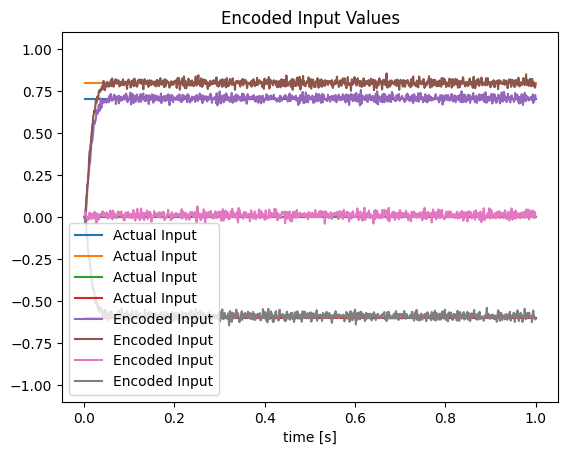

In [27]:
# Create a model to perform the sorting
model = nengo.Network(label="SortArray")
with model:
    # Add input node
    input_node = ???

    # Add neuron ensembles to encode each value of the array
    input_ensemble = ???

    # Connect the node to the neuron ensemble
    ???

    # Add probes to your node and ensemble
    ???
    ???

# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    sim.run(???)

# Plot the input array and the respective decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(???)
plt.plot(???)
plt.legend()
plt.ylim(-1.1, 1.1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

### Set up neurons to perform the comparisons required for Bubble Sort

We need neuron ensembles to compare each of the inputs from left to right, two at a time.

Notes:
- You will need a `combine_ensemble` and a `compare_ensemble` for each comparison since you will compare 2 distinct values at a time. 
- For an array of four values, determine how many total comparisons $N$ will be required to sort the array into ascending order. You can either have a $2\times N$ dimensional `combine_ensemble` that holds all of your values that will feed into your comparisons and index accordingly, or you can have $N$ 2-D `combine_ensemble_n`, where `n` is the increment number (i.e. $1, 2, 3, ...$). 
- You will need to retain the smaller values of the comparison for the next pass. Consider the impact on your `compare_ensemble` dimensions. Again, you can either have `compare_ensemble` or `compare_ensemble_n`
- Whichever route you use for programming your combine and compare ensembles, be sure to choose enough neurons to best represent these functions!
- Also consider your radii! What happens if you are comparing the extremes?
- Build your compare function(s) outside of the model

In [28]:
with model:
    # Create combine and compare ensembles
    ???

# Create a function to return the largest value
def ???

### Connect and Probe all the things!

Now, connect all of your neuron ensembles to implement bubble sort. Watch your indexing!!

In [29]:
with model:
    # Create connections to implement bubblesort!
    ???

Add probes to the outputs to see how well our neurons sorted your input array. Don't forget your `synapse` argument.

In [30]:
with model:
    # add probes to 4 output neurons (those contributing to the sorted array)
    ???
    ???
    ???
    ???

Run your updated model with a simulation time that makes sense

In [31]:
with nengo.Simulator(model) as sim:
    sim.run(???)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

### Plot the data!

**Recommendation:** Probe and plot debug nodes throughout the bubble sort implementation to ensure you are comparing the right things! Hand crank the computations and compare to the plots as you debug.  

**Required for final Gradescope submission:** 
- Plot 1: Plot your _encoded_ input
- Plot 2: Plot the probes associated with those that will give the correct sorted array. This will require indexing. **Include a key, otherwise I won't know if it sorted correctly!**

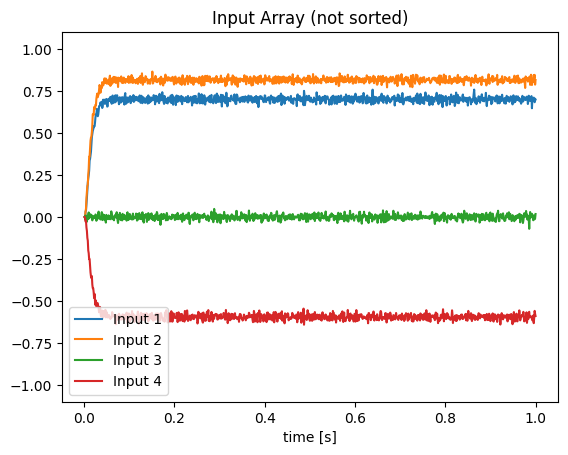

Input Array = [ 0.7  0.8  0.  -0.6]


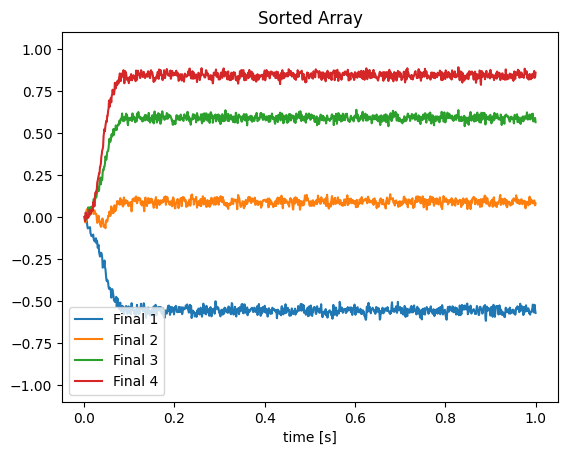

In [32]:
## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(???)
plt.legend()
plt.ylim(-1.1, 1.1)
plt.xlabel("time [s]")
plt.title("Input Array (not sorted)")
plt.show()

print("Input Array =", input_array)

## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(???)
plt.plot(???)
plt.plot(???)
plt.plot(???)
plt.legend()
plt.ylim(-1.1, 1.1)
plt.xlabel("time [s]")
plt.title("Sorted Array")
plt.show()

### Discussion

- Why do your sorted outputs have a weird curve at the beginning? Consider inherent Nengo neuron dynamics.
- Why didn't we try to reuse the comparison functions instead of doing separate comparisons $N$ times? Recall our dynamics lectures.
- How would we do this for any-dimensional array (i.e. how would we generalize this implementation)?
